In [1]:
import sys
import matplotlib.animation
print matplotlib.animation.writers.list()
print sys.path

sys.path.insert(0,'/home/antolikjan/projects/mozaikold/contrib')
import lsv1m_paper
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *

from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

import sys
%matplotlib inline

setup_logging()

#ANULUS
#data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/20190912-113106[param_FINAL.defaults]CombinationParamSearch{sheets.l4_cortex_exc.K:[1000]}/SelfSustainedPushPull_ParameterSearch_____sheets.l4_cortex_exc.K:1000','store_stimuli': False}),replace=True)


#data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/20190802-172315[param_FINAL.defaults]CombinationParamSearch{sheets.l4_cortex_exc.K:[1000]}/SelfSustainedPushPull_ParameterSearch_____sheets.l4_cortex_exc.K:1000','store_stimuli': False}),replace=True)
#data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/20190802-171703[param_FINAL.defaults]CombinationParamSearch{sheets.l4_cortex_exc.K:[1000]}/SelfSustainedPushPull_ParameterSearch_____sheets.l4_cortex_exc.K:1000','store_stimuli': False}),replace=True)

#data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/20190830-102943[param_FINAL.defaults]CombinationParamSearch{sheets.l4_cortex_exc.K:[1000]}/SelfSustainedPushPull_ParameterSearch_____sheets.l4_cortex_exc.K:1000','store_stimuli': False}),replace=True)

#data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/20190912-112957[param_FINAL.defaults]CombinationParamSearch{sheets.l4_cortex_exc.K:[1000]}/SelfSustainedPushPull_ParameterSearch_____sheets.l4_cortex_exc.K:1000','store_stimuli': False}),replace=True)


data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.2/A/','store_stimuli': False}),replace=True)



    
NeuronAnnotationsToPerNeuronValues(data_store,ParameterSet({})).analyse()
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_esyn_ids()

#find neuron with preference closet to 0  
l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l4_exc_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')[0]
l4_exc = analog_ids[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.get_value_by_id(analog_ids),l4_exc_phase.get_value_by_id(analog_ids))])]
l4_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L4')[0]
l4_inh_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Inh_L4')[0]
l4_inh = analog_ids_inh[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_inh_or.get_value_by_id(analog_ids_inh),l4_inh_phase.get_value_by_id(analog_ids_inh))])]
l4_exc_or_many = numpy.array(l4_exc_or.ids)[numpy.nonzero(numpy.array([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.values,l4_exc_phase.values)]) < 0.1)[0]]

[u'imagemagick_file', u'imagemagick', u'ffmpeg', u'ffmpeg_file']
['', '/home/antolikjan/installs/nest-2.2.1/build/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaikold/lib/python2.7', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/plat-x86_64-linux-gnu', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/lib-old', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/lib-dynload', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/mozaikold/local/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaikold/local/lib/python2.7/site-packages/PIL', '/home/antolikjan/virt_env/mozaikold/local/lib/python2.7/site-packages/neo-0.7.2-py2.7.egg', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages/PIL', '/home/antolikjan/virt_env/mozaikold/lib/python2.7/site-packages/n

INFO:Mozaik:Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues analysis
INFO:Mozaik:Starting NeuronAnnotationsToPerNeuronValues Analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":3.141592653589793, "sheet_name":'V1_Exc_L2/3', "stimulus_id":None, "value_name":'LGNAfferentOrientation'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Exc_L4', "stimulus_id":None, "value_name":'LGNAfferentX'}
INFO:Mozaik:Warning

INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":3.141592653589793, "sheet_name":'V1_Inh_L4', "stimulus_id":None, "value_name":'LGNAfferentOrientation'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neuron":None, "period":None, "sheet_name":'V1_Inh_L4', "stimulus_id":None, "value_name":'LGNAfferentSize'}
INFO:Mozaik:Warning: ADS with the same parametrization already added in the datastore.: {"module_path" :"mozaik.analysis.data_structures","analysis_algorithm":'NeuronAnnotationsToPerNeuronValues', "identifier":'PerNeuronValue', "name":'PerNeuronValue', "neur

In [14]:
data_store.get_stimuli()

['{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":84000, "frame_duration":84000, "name":\'InternalStimulus\', "trial":0}',
 '{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":84000, "frame_duration":84000, "name":\'InternalStimulus\', "trial":0}',
 '{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":84000, "frame_duration":84000, "name":\'InternalStimulus\', "trial":0}',
 '{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":84000, "frame_duration":84000, "name":\'InternalStimulus\', "trial":0}',
 '{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":84000, "frame_duration":84000, "name":\'InternalStimulus\', "trial":0}',
 '{"module_path" :"mozaik.stimuli","direct_stimulation_name":\'None\', "duration":84000, "frame_duration":84000, "name":\'InternalStimulus\', "trial":0}',
 '{"module_path" :"mozaik.stimuli.vision.topographica_based","backgrou

In [2]:
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
spike_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_spike_train_ids()

analog_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_esyn_ids()
spike_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_spike_train_ids()


l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l23_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L2/3')[0]
l4_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L4')[0]
l23_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L2/3')[0]


l4_exc_or_many = numpy.array(spike_ids)[numpy.nonzero(numpy.array([circular_dist(l4_exc_or.get_value_by_id(i),0,numpy.pi)  for i in spike_ids]) < 0.05)[0]]
l23_exc_or_many = numpy.array(spike_ids23)[numpy.nonzero(numpy.array([circular_dist(l23_exc_or.get_value_by_id(i),0,numpy.pi)  for i in spike_ids23]) < 0.05)[0]]


l4_exc_or_many_analog = numpy.array(analog_ids)[numpy.nonzero(numpy.array([circular_dist(l4_exc_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids]) < 0.1)[0]]
l4_exc_or_many_analog_inh = numpy.array(analog_ids_inh)[numpy.nonzero(numpy.array([circular_dist(l4_inh_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids_inh]) < 0.1)[0]]

l23_exc_or_many_analog = numpy.array(analog_ids23)[numpy.nonzero(numpy.array([circular_dist(l23_exc_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids23]) < 0.1)[0]]
l23_exc_or_many_analog_inh = numpy.array(analog_ids_inh23)[numpy.nonzero(numpy.array([circular_dist(l23_inh_or.get_value_by_id(i),0,numpy.pi)  for i in analog_ids_inh23]) < 0.1)[0]]

idx23 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L2/3',neuron_ids=l23_exc_or_many)
idx4 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L4',neuron_ids=l4_exc_or_many)



x = data_store.get_neuron_postions()['V1_Exc_L4'][0][idx4]
y = data_store.get_neuron_postions()['V1_Exc_L4'][1][idx4]
center4 = l4_exc_or_many[numpy.nonzero(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)) < 0.3)[0]]
center4_x = data_store.get_neuron_postions()['V1_Exc_L4'][0][data_store.get_sheet_indexes(sheet_name='V1_Exc_L4',neuron_ids=center4)]
center4_y = data_store.get_neuron_postions()['V1_Exc_L4'][1][data_store.get_sheet_indexes(sheet_name='V1_Exc_L4',neuron_ids=center4)]
center4_or = l4_exc_or.get_value_by_id(center4)

x = data_store.get_neuron_postions()['V1_Exc_L2/3'][0][idx23]
y = data_store.get_neuron_postions()['V1_Exc_L2/3'][1][idx23]
center23 = l23_exc_or_many[numpy.nonzero(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)) < 0.3)[0]]
xl23 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L2/3',neuron_ids=center23)
center23_x = data_store.get_neuron_postions()['V1_Exc_L2/3'][0][data_store.get_sheet_indexes(sheet_name='V1_Exc_L2/3',neuron_ids=center23)]
center23_y = data_store.get_neuron_postions()['V1_Exc_L2/3'][1][data_store.get_sheet_indexes(sheet_name='V1_Exc_L2/3',neuron_ids=center23)]
center23_or = l23_exc_or.get_value_by_id(center23)


analog_center4 = set(center4).intersection(analog_ids)
analog_center23 = set(center23).intersection(analog_ids23)

print len(analog_center4)
print len(analog_center23)
print len(center4)
print len(center23)


1
1
17
17


In [ ]:
pylab.figure()
pylab.scatter(center4_x,center4_y,c=center4_or,vmin=0,vmax=numpy.pi,cmap='hsv')
pylab.xlim(-3,3)
pylab.ylim(-3,3)

pylab.figure()
pylab.scatter(center23_x,center23_y,c=center23_or,vmin=0,vmax=numpy.pi,cmap='hsv')
pylab.xlim(-3,3)
pylab.ylim(-3,3)

pylab.figure()
pylab.scatter(x,y,c=l23_exc_or.get_value_by_id(l23_exc_or_many),vmin=0,vmax=numpy.pi,cmap='hsv')
pylab.xlim(-3,3)
pylab.ylim(-3,3)

In [5]:
dsv1 = param_filter_query(data_store,st_name='FlashedInterruptedBar',analysis_algorithm=['TrialAveragedFiringRate'],st_relative_luminance=1.0,st_gap_length=0,sheet_name='V1_Exc_L4')    

In [6]:
a = [(MozaikParametrized.idd(adv.stimulus_id).y,adv.get_value_by_id(center4[4]))  for adv in dsv1.get_analysis_result()]
pylab.figure()
pylab.plot(zip(*a)[0],zip(*a)[1],'o') 
print zip(*a)[0]

IndexError: list index out of range

In [46]:
import pickle
interr_condition_l4 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/BarGap/A/average_firing_rates_l4_data.pickle','rb'))
interr_condition_l23 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/BarGap/A/average_firing_rates_l23_data.pickle','rb'))

cross_condition_l4 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/BarGapWithDisruptor/A/average_firing_rates_l4_data.pickle','rb'))
cross_condition_l23 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/BarGapWithDisruptor/A/average_firing_rates_l23_data.pickle','rb'))

bar_condition_l4 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/BarSizeTuning/A/average_firing_rates_l4_data.pickle','rb'))
bar_condition_l23 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/BarSizeTuning/A/average_firing_rates_l23_data.pickle','rb'))

annulus_condition_l4 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/Annulus/A/average_firing_rates_l4_data.pickle','rb'))
annulus_condition_l23 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/Annulus/A/average_firing_rates_l23_data.pickle','rb'))

size_condition_l4 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/SizeTuning/A/average_firing_rates_l4_data.pickle','rb'))
size_condition_l23 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/SizeTuning/A/average_firing_rates_l23_data.pickle','rb'))

phase_mapping_l4 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/PhaseMapping/A/average_firing_rates_l4_data.pickle','rb'))
phase_mapping_l23 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/RESULTS/PhaseMapping/A/average_firing_rates_l23_data.pickle','rb'))



In [38]:
from cycler import cycler
pylab.rcParams['axes.color_cycle'] = ['#0072B2', '#009E73', '#D55E00', '#CC79A7','#F0E442', '#56B4E9']

center_idx4 = numpy.array([numpy.where(interr_condition_l4[3]==c)[0][0] for c in center4])
center_idx23 = numpy.array([numpy.where(interr_condition_l23[3]==c)[0][0] for c in center23])
print len(center_idx4)
print len(center_idx23)
print center_idx4
print center_idx23



17
17
[ 12  79 113 213 314 370 406 418 529 554 600 721 842 847 866 908 932]
[ 34  65  76 102 104 118 178 236 256 345 604 685 698 805 870 874 941]


/home/antolikjan/virt_env/mozaikold/local/lib/python2.7/site-packages/matplotlib/__init__.py:895: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
center_idx4 = [ 12 , 31,  44,  69 , 78 , 79 , 89, 113, 128, 129, 146, 194, 201, 213, 233, 244, 267, 296,
 308 ,314 ,325 ,359 ,370 ,386 ,406 ,418 ,471 ,529 ,554 ,574 ,579 ,600 ,623 ,721 ,728, 761,
 781 ,836 ,842, 847, 863, 866, 875, 879, 908, 932, 943, 952]
center_idx23 = [ 30,  34,  65,  70,  76, 102, 104, 118, 120, 156, 178, 236, 244, 255, 256, 257, 306, 331,
 338, 345, 386, 387, 399, 542, 583, 604, 643, 685, 698, 704, 718, 729, 741, 771, 805, 870,
 874, 898, 941, 948, 952]

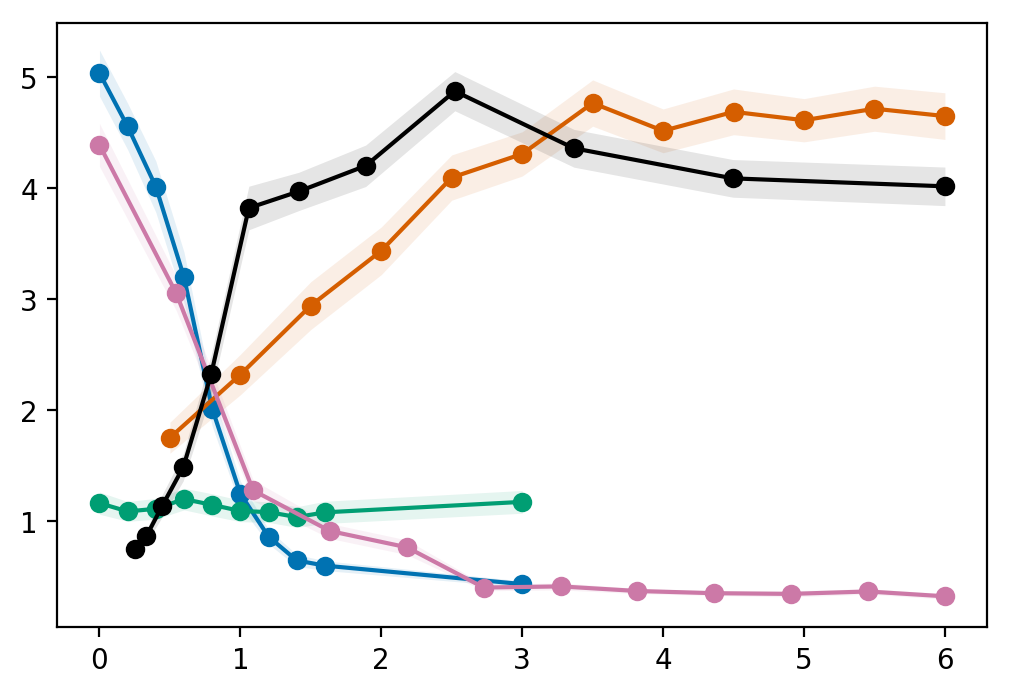

In [5]:
pylab.figure(dpi=200)

a = numpy.array([interr_condition_l4[0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4]
pylab.plot(interr_condition_l4[2][0],numpy.mean(a,axis=0),'-o',color='#0072B2')
pylab.fill_between(interr_condition_l4[2][0],numpy.mean(a,axis=0)-scipy.stats.sem(a,axis=0),numpy.mean(a,axis=0)+scipy.stats.sem(a,axis=0),color='#0072B2', alpha=0.1)

a = numpy.array([cross_condition_l4[0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4]
pylab.plot(cross_condition_l4[2][0],numpy.mean(a,axis=0),'-o',color='#009E73')
pylab.fill_between(cross_condition_l4[2][0],numpy.mean(a,axis=0)-scipy.stats.sem(a,axis=0),numpy.mean(a,axis=0)+scipy.stats.sem(a,axis=0),color='#009E73', alpha=0.1)

a = numpy.array([bar_condition_l4[0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4]
pylab.plot(bar_condition_l4[2][0],numpy.mean(a,axis=0),'-o',color='#D55E00')
pylab.fill_between(bar_condition_l4[2][0],numpy.mean(a,axis=0)-scipy.stats.sem(a,axis=0),numpy.mean(a,axis=0)+scipy.stats.sem(a,axis=0),color='#D55E00', alpha=0.1)

a = annulus_condition_l4[0][:,center_idx4]
pylab.plot(annulus_condition_l4[2][0]*2,numpy.mean(a,axis=1),'-o',color='#CC79A7')
pylab.fill_between(annulus_condition_l4[2][0]*2,numpy.mean(a,axis=1)-scipy.stats.sem(a,axis=1),numpy.mean(a,axis=1)+scipy.stats.sem(a,axis=1),color='#CC79A7', alpha=0.1)

a = size_condition_l4[0][:,center_idx4]
pylab.plot(size_condition_l4[2][0]*2,numpy.mean(a,axis=1),'-o',color='#000000')
pylab.fill_between(size_condition_l4[2][0]*2,numpy.mean(a,axis=1)-scipy.stats.sem(a,axis=1),numpy.mean(a,axis=1)+scipy.stats.sem(a,axis=1),color='#000000', alpha=0.1)



In [23]:
interr_condition_l4[2]

[array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  3. ]),
 array([-0.75, -0.45, -0.15,  0.15,  0.45,  0.75])]

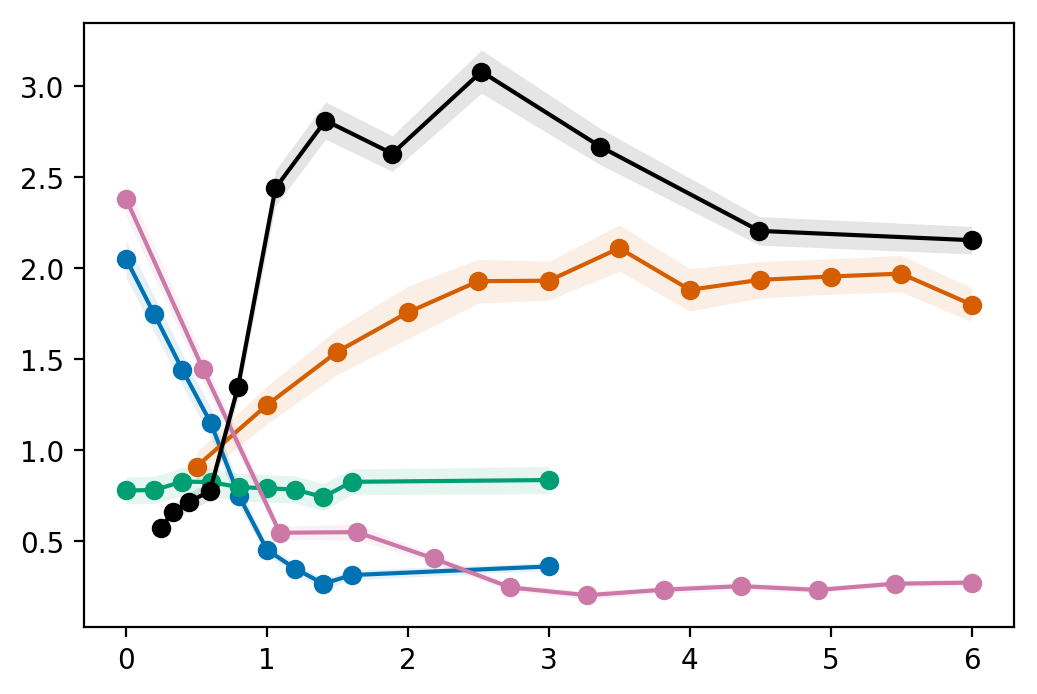

In [6]:
pylab.figure(dpi=200)

a = numpy.array([interr_condition_l23[0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l23[0][0],axis=0))])[center_idx23]
pylab.plot(interr_condition_l23[2][0],numpy.mean(a,axis=0),'-o',color='#0072B2')
pylab.fill_between(interr_condition_l23[2][0],numpy.mean(a,axis=0)-scipy.stats.sem(a,axis=0),numpy.mean(a,axis=0)+scipy.stats.sem(a,axis=0),color='#0072B2', alpha=0.1)

a = numpy.array([cross_condition_l23[0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l23[0][0],axis=0))])[center_idx23]
pylab.plot(cross_condition_l23[2][0],numpy.mean(a,axis=0),'-o',color='#009E73')
pylab.fill_between(cross_condition_l23[2][0],numpy.mean(a,axis=0)-scipy.stats.sem(a,axis=0),numpy.mean(a,axis=0)+scipy.stats.sem(a,axis=0),color='#009E73', alpha=0.1)

a = numpy.array([bar_condition_l23[0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l23[0][0],axis=0))])[center_idx23]
pylab.plot(bar_condition_l23[2][0],numpy.mean(a,axis=0),'o-',color='#D55E00')
pylab.fill_between(bar_condition_l23[2][0],numpy.mean(a,axis=0)-scipy.stats.sem(a,axis=0),numpy.mean(a,axis=0)+scipy.stats.sem(a,axis=0),color='#D55E00', alpha=0.1)

a = annulus_condition_l23[0][:,center_idx23]
pylab.plot(annulus_condition_l23[2][0]*2,numpy.mean(a,axis=1),'o-',color='#CC79A7')
pylab.fill_between(annulus_condition_l23[2][0]*2,numpy.mean(a,axis=1)-scipy.stats.sem(a,axis=1),numpy.mean(a,axis=1)+scipy.stats.sem(a,axis=1),color='#CC79A7', alpha=0.1)

a = size_condition_l23[0][:,center_idx23]
pylab.plot(size_condition_l23[2][0]*2,numpy.mean(a,axis=1),'-o',color='#000000')
pylab.fill_between(size_condition_l23[2][0]*2,numpy.mean(a,axis=1)-scipy.stats.sem(a,axis=1),numpy.mean(a,axis=1)+scipy.stats.sem(a,axis=1),color='#000000', alpha=0.1)


In [26]:
bar_condition_l23[1]

['length', 'y']

[ 0.          0.27272727  0.54545455  0.81818182  1.09090909  1.36363636
  1.63636364  1.90909091  2.18181818  2.45454545  2.72727273  3.        ]


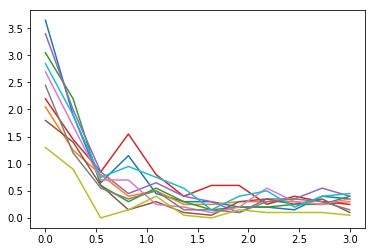

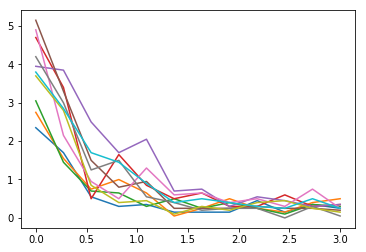

In [12]:
import numpy
import pylab

#a = numpy.array([bar_condition_l23[0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(bar_condition_l23[0][3],axis=0))])[center_idx23]
#pylab.plot(a[15])
#pylab.figure()
#pylab.plot(numpy.max(bar_condition_l23[0],axis=1)[:,center_idx23])

print annulus_condition_l23[2][0]

pylab.figure()
a = annulus_condition_l23[0][:,center_idx23[0:10]]
pylab.plot(annulus_condition_l23[2][0],a,'-')

pylab.figure()
a = annulus_condition_l4[0][:,center_idx4[0:10]]
pylab.plot(annulus_condition_l4[2][0],a,'-')


(39, 10)


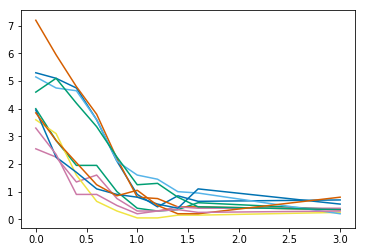

In [64]:
a = numpy.array([interr_condition_l4[0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4]
#a = numpy.mean(a,axis=0)
pylab.figure()
print numpy.shape(a)
pylab.plot(interr_condition_l4[2][0],a.T[:,0:10],'-')


(12, 12, 966)
[array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ]), array([-1.5       , -1.22727273, -0.95454545, -0.68181818, -0.40909091,
       -0.13636364,  0.13636364,  0.40909091,  0.68181818,  0.95454545,
        1.22727273,  1.5       ])]


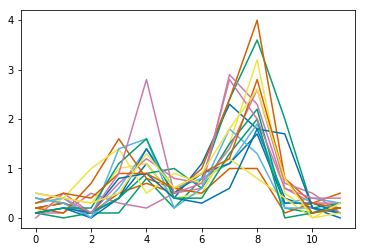

In [51]:
print numpy.shape(phase_mapping_l23[0])
print phase_mapping_l23[2]
pylab.plot(phase_mapping_l23[0][11,:,center_idx23].T)

(array([ 1.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,  1.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

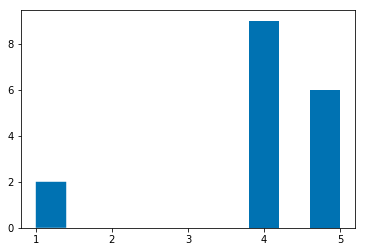

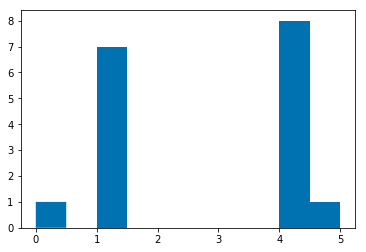

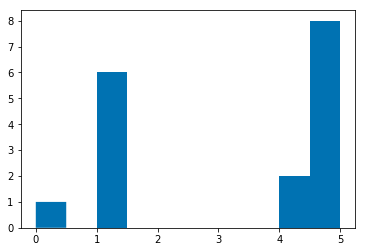

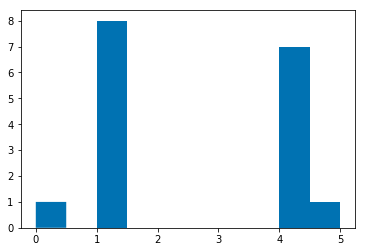

In [39]:
pylab.hist(numpy.argmax(bar_condition_l23[0][11],axis=0)[center_idx23])
pylab.figure()
pylab.hist(numpy.argmax(bar_condition_l4[0][11],axis=0)[center_idx4])

pylab.figure()
pylab.hist(numpy.argmax(interr_condition_l23[0][0],axis=0)[center_idx23])
pylab.figure()
pylab.hist(numpy.argmax(interr_condition_l4[0][0],axis=0)[center_idx4])


In [57]:
bar_condition_l4[2]

[array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  3. ]),
 array([-0.75, -0.45, -0.15,  0.15,  0.45,  0.75])]

In [7]:
disalignment_condition_l4 = {
  0.0 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.0/A/average_firing_rates_l4_data.pickle','rb')),    
  0.1 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/average_firing_rates_l4_data.pickle','rb')),    
  0.2 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.2/A/average_firing_rates_l4_data.pickle','rb')),    
  0.6 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.6/A/average_firing_rates_l4_data.pickle','rb')),    
  0.8 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.8/A/average_firing_rates_l4_data.pickle','rb')),      
}

disalignment_condition_l23 = {
  0.0 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.0/A/average_firing_rates_l23_data.pickle','rb')),    
  0.1 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/average_firing_rates_l23_data.pickle','rb')),    
  0.2 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.2/A/average_firing_rates_l23_data.pickle','rb')),    
  0.6 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.6/A/average_firing_rates_l23_data.pickle','rb')),    
  0.8 :  pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.8/A/average_firing_rates_l23_data.pickle','rb')),      
}



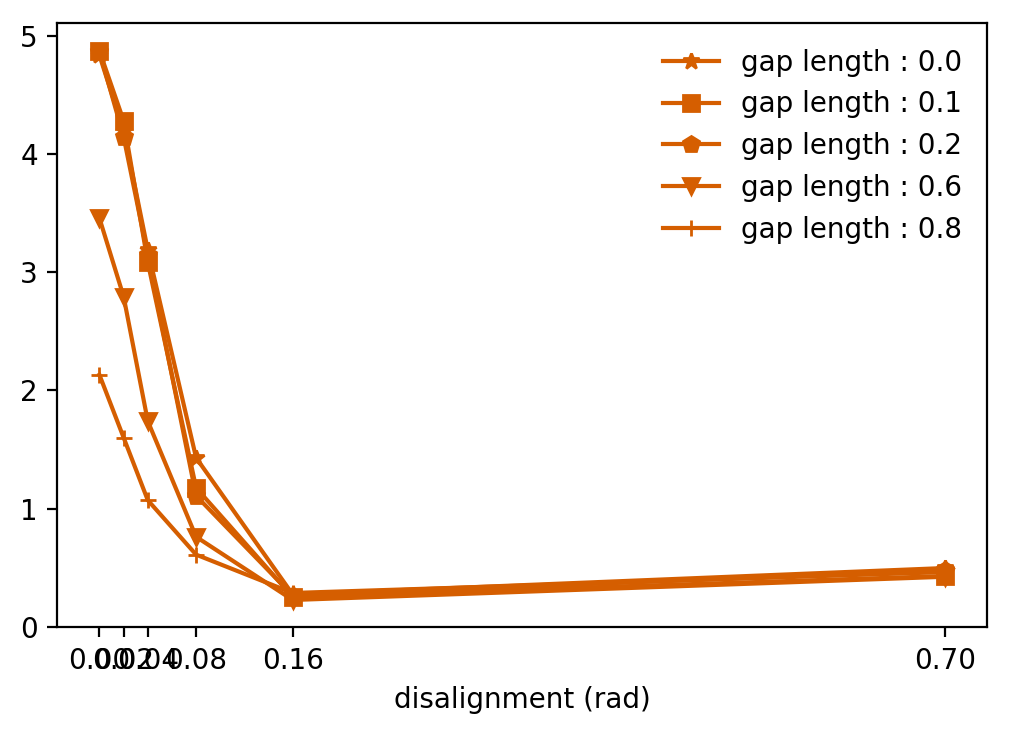

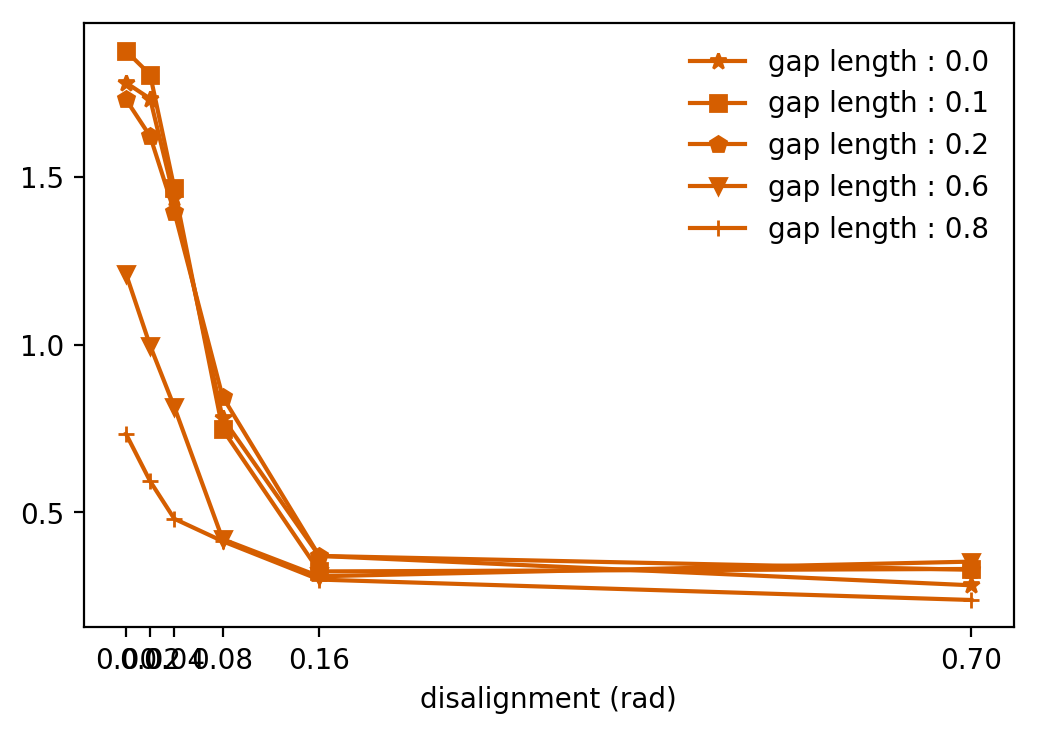

In [9]:
pylab.figure(dpi=200)
pylab.plot(disalignment_condition_l4[0.0][2][0],numpy.mean(numpy.array([disalignment_condition_l4[0.0][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4],axis=0),'-*',label='gap length : 0.0',color='#D55E00')
pylab.plot(disalignment_condition_l4[0.1][2][0],numpy.mean(numpy.array([disalignment_condition_l4[0.1][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4],axis=0),'-s',label='gap length : 0.1',color='#D55E00')
pylab.plot(disalignment_condition_l4[0.2][2][0],numpy.mean(numpy.array([disalignment_condition_l4[0.2][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4],axis=0),'-p',label='gap length : 0.2',color='#D55E00')
pylab.plot(disalignment_condition_l4[0.6][2][0],numpy.mean(numpy.array([disalignment_condition_l4[0.6][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4],axis=0),'-v',label='gap length : 0.6',color='#D55E00')
pylab.plot(disalignment_condition_l4[0.8][2][0],numpy.mean(numpy.array([disalignment_condition_l4[0.8][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l4[0][0],axis=0))])[center_idx4],axis=0),'-+',label='gap length : 0.8',color='#D55E00')
pylab.xticks(disalignment_condition_l4[0.1][2][0])
pylab.legend()
pylab.xlabel('disalignment (rad)')

pylab.figure(dpi=200)
pylab.plot(disalignment_condition_l23[0.0][2][0],numpy.mean(numpy.array([disalignment_condition_l23[0.0][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l23[0][0],axis=0))])[center_idx23],axis=0),'-*',label='gap length : 0.0',color='#D55E00')
pylab.plot(disalignment_condition_l23[0.1][2][0],numpy.mean(numpy.array([disalignment_condition_l23[0.1][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l23[0][0],axis=0))])[center_idx23],axis=0),'-s',label='gap length : 0.1',color='#D55E00')
pylab.plot(disalignment_condition_l23[0.2][2][0],numpy.mean(numpy.array([disalignment_condition_l23[0.2][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l23[0][0],axis=0))])[center_idx23],axis=0),'-p',label='gap length : 0.2',color='#D55E00')
pylab.plot(disalignment_condition_l23[0.6][2][0],numpy.mean(numpy.array([disalignment_condition_l23[0.6][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l23[0][0],axis=0))])[center_idx23],axis=0),'-v',label='gap length : 0.6',color='#D55E00')
pylab.plot(disalignment_condition_l23[0.8][2][0],numpy.mean(numpy.array([disalignment_condition_l23[0.8][0][:,idx,i] for (i,idx) in enumerate(numpy.argmax(interr_condition_l23[0][0],axis=0))])[center_idx23],axis=0),'-+',label='gap length : 0.8',color='#D55E00')
pylab.xticks(disalignment_condition_l23[0.1][2][0])
pylab.legend()
pylab.xlabel('disalignment (rad)')




In [24]:
disalignment_spikes_l4 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/average_firing_rates_l4_data.pickle','rb'))    
disalignment_spikes_l23 = pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/average_firing_rates_l23_data.pickle','rb'))    

disalignment_EEG_l4 = {
  0.0 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.0_L4_center.pickle','rb')),    
  0.02 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.02_L4_center.pickle','rb')),        
  0.04 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.04_L4_center.pickle','rb')),        
  0.08 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.08_L4_center.pickle','rb')),    
  0.16 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.16_L4_center.pickle','rb')),        
  0.7 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.7_L4_center.pickle','rb')),    
}

disalignment_EEG_l23 = {
  0.0 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.0_L23_center.pickle','rb')),    
  0.02 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.02_L23_center.pickle','rb')),        
  0.04 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.04_L23_center.pickle','rb')),        
  0.08 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.08_L23_center.pickle','rb')),    
  0.16 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.16_L23_center.pickle','rb')),        
  0.7 : pickle.load(open('/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.7_L23_center.pickle','rb')),    
}




IOError: [Errno 2] No such file or directory: '/home/antolikjan/remote/UNIC/dev/pkg/mozaik/mozaik/contrib/New/Disalignment_0.1/A/TimecourseLFP__disalignment_0.0_L23_center.pickle'

[0.0, 0.04, 0.02, 0.08, 0.7, 0.16]
[ 1.          0.85449458  0.84136902  0.81629519  0.81271027  0.44207704]


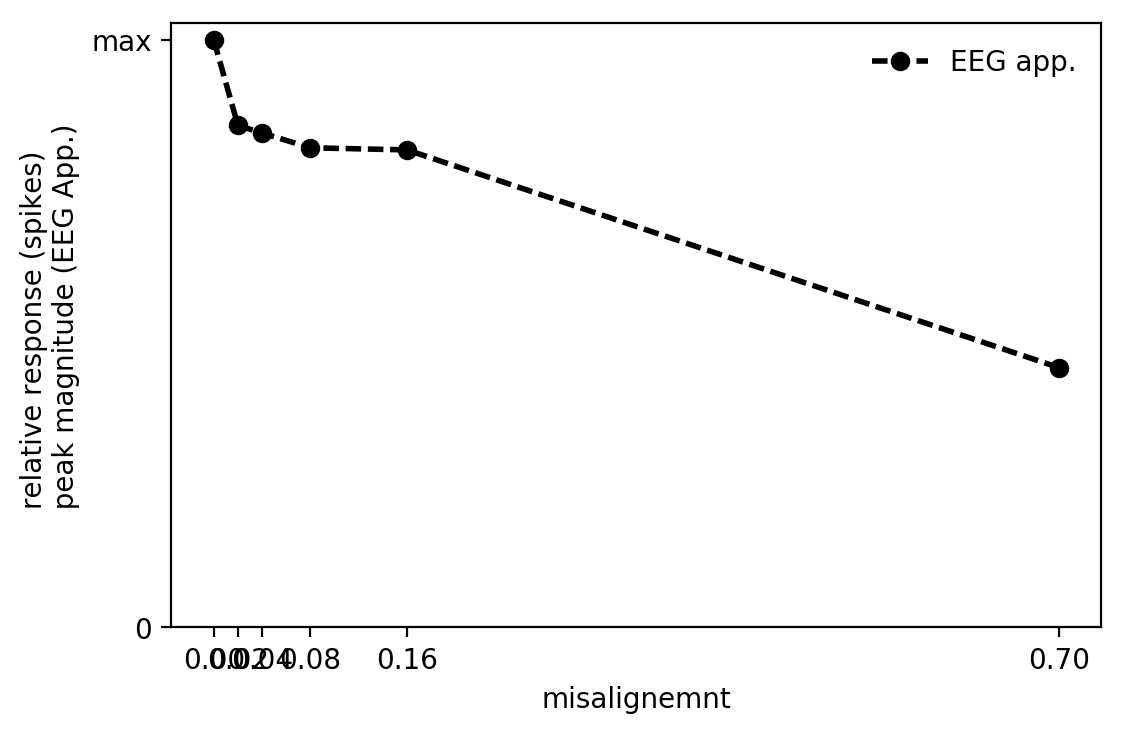

In [23]:
x=4
analog_idx4 = numpy.array([numpy.where(disalignment_spikes_l4[3]==c)[0][0] for c in analog_ids])
#analog_idx23 = numpy.array([numpy.where(disalignment_spikes_l23[3]==c)[0][0] for c in analog_ids23])

a=numpy.array([numpy.min(disalignment_EEG_l4[k]) for k in [0,0.02,0.04,0.08,0.16,0.7]])
a=a/a[0]

print disalignment_EEG_l4.keys() 
print a

pylab.figure(dpi=200)
#pylab.errorbar(disalignment_spikes_l4[2][0],numpy.mean(disalignment_spikes_l4[0][:,x,numpy.array(analog_idx4)],axis=1)/numpy.mean(disalignment_spikes_l4[0][:,x,numpy.array(analog_idx4)],axis=1)[0],yerr=scipy.stats.sem(disalignment_spikes_l4[0][:,x,numpy.array(analog_idx4)],axis=1),color='k',lw=2,label='spikes')
pylab.plot([0,0.02,0.04,0.08,0.16,0.7],a,'o--k',lw=2,label='EEG app.')
pylab.legend()
pylab.xticks([0,0.02,0.04,0.08,0.16,0.7])
pylab.yticks([0,1],[0,'max'])
pylab.xlabel('misalignemnt')
pylab.ylabel('relative response (spikes) \n  peak magnitude (EEG App.)')

NameError: name 'disalignment_EEG_l23' is not defined

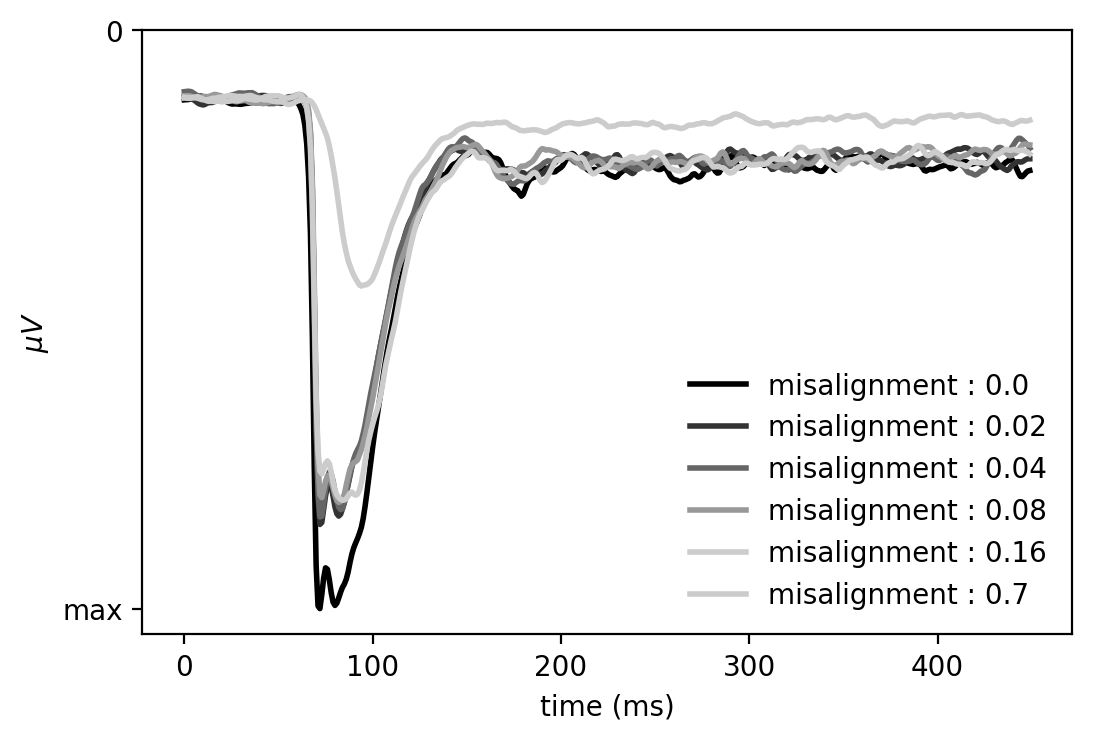

In [22]:
pylab.figure(dpi=200)
pylab.plot(-disalignment_EEG_l4[0.0][:450]/numpy.min(disalignment_EEG_l4[0.0][:450]),lw=2,color="#000000",label='misalignment : 0.0')
pylab.plot(-disalignment_EEG_l4[0.02][:450]/numpy.min(disalignment_EEG_l4[0.0][:450]),lw=2,color="#333333",label='misalignment : 0.02')
pylab.plot(-disalignment_EEG_l4[0.04][:450]/numpy.min(disalignment_EEG_l4[0.0][:450]),lw=2,color="#666666",label='misalignment : 0.04')
pylab.plot(-disalignment_EEG_l4[0.08][:450]/numpy.min(disalignment_EEG_l4[0.0][:450]),lw=2,color="#999999",label='misalignment : 0.08')
pylab.plot(-disalignment_EEG_l4[0.16][:450]/numpy.min(disalignment_EEG_l4[0.0][:450]),lw=2,color="#CCCCCC",label='misalignment : 0.16')
pylab.plot(-disalignment_EEG_l4[0.7][:450]/numpy.min(disalignment_EEG_l4[0.0][:450]),lw=2,color="#CCCCCC",label='misalignment : 0.7')
pylab.yticks([0,-1.0],[0,'max'])
pylab.xlabel('time (ms)')
pylab.ylabel(r'$\mu V$')
pylab.legend()


pylab.figure(dpi=200)
pylab.plot(-disalignment_EEG_l23[0.0][:450]/numpy.min(disalignment_EEG_l23[0.0][:450]),lw=2,color="#000000",label='misalignment : 0.0')
pylab.plot(-disalignment_EEG_l23[0.1][:450]/numpy.min(disalignment_EEG_l23[0.0][:450]),lw=2,color="#333333",label='misalignment : 0.1')
pylab.plot(-disalignment_EEG_l23[0.2][:450]/numpy.min(disalignment_EEG_l23[0.0][:450]),lw=2,color="#666666",label='misalignment : 0.2')
pylab.plot(-disalignment_EEG_l23[0.3][:450]/numpy.min(disalignment_EEG_l23[0.0][:450]),lw=2,color="#999999",label='misalignment : 0.3')
pylab.plot(-disalignment_EEG_l23[0.4][:450]/numpy.min(disalignment_EEG_l23[0.0][:450]),lw=2,color="#CCCCCC",label='misalignment : 0.4')
pylab.yticks([0,-1.0],[0,'max'])
pylab.xlabel(r'$\mu V$')
pylab.legend()